In [29]:
# Bibek Shiwakoti
import matplotlib.pyplot as plt
import seaborn as sns

### Lecture 9: Implementing linear regression using python

- Residual sum square (RSS) also called min sum square error
- Y= B0 + B1X1 + B2X2 +....+ BnXn + e

### Import and fitting a linear model

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

import math

In [7]:
housing = fetch_california_housing()
print(type(housing))
print(housing.target)

<class 'sklearn.utils._bunch.Bunch'>
[4.526 3.585 3.521 ... 0.923 0.847 0.894]


In [15]:
data = housing.data[:,0:2]

In [16]:
target = housing.target

In [10]:
df = pd.DataFrame(data,columns = ['Feature0','Feature1'])
df['target'] = housing.target
print(df.shape)

(20640, 3)


In [11]:
df.head(1)

,Feature0,Feature1,target
0,8.3252,41.0,4.526


In [17]:
df.describe()

,Feature0,Feature1,target
count,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,2.068558
std,1.899822,12.585558,1.153956
min,0.499900,1.000000,0.149990
25%,2.563400,18.000000,1.196000
50%,3.534800,29.000000,1.797000
75%,4.743250,37.000000,2.647250
max,15.000100,52.000000,5.000010


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature0  20640 non-null  float64
 1   Feature1  20640 non-null  float64
 2   target    20640 non-null  float64
dtypes: float64(3)
memory usage: 483.9 KB


<Axes: >

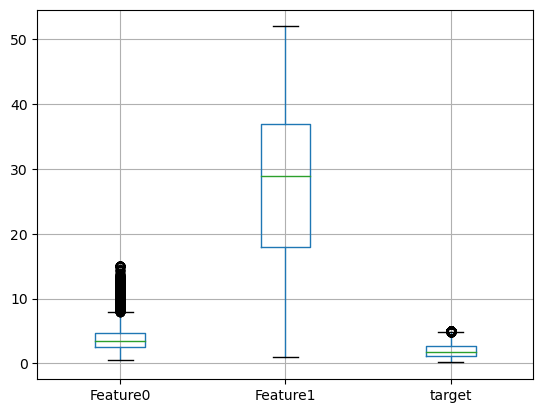

In [19]:
df.boxplot()

In [ ]:

# # Histograms
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 2, 1)
# sns.histplot(df['Feature0'], kde=True, color='blue')
# plt.title('Feature0 Histogram')

# # plt.subplot(2, 2, 2)
# # sns.histplot(df['Feature1'], kde=True, color='green')
# # plt.title('Feature1 Histogram')

# # # Boxplots
# # plt.subplot(2, 2, 3)
# # sns.boxplot(x='target', y='Feature0', data=df)
# # plt.title('Boxplot of Feature0 by target')

# # plt.subplot(2, 2, 4)
# # sns.boxplot(x='target', y='Feature1', data=df)
# # plt.title('Boxplot of Feature1 by target')

# plt.tight_layout()
# plt.show()

### Slitting data into train and test

In [40]:
X = df[['Feature0','Feature1']]
y=df['target']

print('X shape:', X.shape)
print('y shape:', y.shape)



X shape: (20640, 2)
y shape: (20640,)


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state =42)

In [38]:
print('X_train.shape: ', X_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (14448, 2)
X_test.shape:  (6192, 2)
y_train.shape:  (14448,)
y_test.shape:  (6192,)


train and test are necessary steps  whereas validatiaon is extra step we should be knowing what insight will given by that validation

### Simple linear regression

In [41]:
regression = LinearRegression()
model = regression.fit(X_train,y_train)


y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### r2 Score train and test

In [43]:
r2_train = r2_score(y_train, y_pred_train)
print('r2_train:', r2_train.round(4))

r2_test = r2_score(y_test, y_pred_test)
print('r2_test:', r2_test.round(4))

r2_train: 0.5093
r2_test: 0.5087


### RMSE

In [53]:
RMSE_train = math.sqrt(mean_squared_error(y_train,y_pred_train))
print('RMSE_train:',round(RMSE_train,3))

RMSE_test = math.sqrt(mean_squared_error(y_test,y_pred_test))
print('RMSE_test:', round(RMSE_test,3))

RMSE_train: 0.811
RMSE_test: 0.803


In [54]:
model.intercept_

-0.10299578449607028

In [55]:
model.coef_

array([0.43176259, 0.01743944])

### Features Interection

In [65]:
interaction = PolynomialFeatures(degree =3, include_bias = False, interaction_only =True)
features_interaction   = interaction.fit_transform(X)
X_train, X_test, y_train, Y_test = train_test_split(features_interaction, y, test_size=0.3,random_state=42)



print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


print('how the features looks like letus print:\n')
X_train[1:4]

X_train shape: (14448, 3)
X_test shape: (6192, 3)
y_train shape: (14448,)
y_test shape: (6192,)
how the features looks like letus print:



array([[  2.8631,  20.    ,  57.262 ],
       [  4.2026,  24.    , 100.8624],
       [  3.1094,  14.    ,  43.5316]])

### Polynomial features

In [66]:
polynomial = PolynomialFeatures(degree = 3, include_bias = False)
features_polynomial = polynomial.fit_transform(X)
features_polynomial[0]

array([8.32520000e+00, 4.10000000e+01, 6.93089550e+01, 3.41333200e+02,
       1.68100000e+03, 5.77010912e+02, 2.84166716e+03, 1.39946612e+04,
       6.89210000e+04])

In [67]:
X_train,X_test, y_train,Y_test = train_test_split(features_polynomial,y,test_size=0.3, random_state =42)
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)


print('how the features looks like letus print:\n')
X_train[1:4]



X_train shape: (14448, 9)
X_test shape: (6192, 9)
y_train shape: (14448,)
y_test shape: (6192,)
how the features looks like letus print:



array([[2.86310000e+00, 2.00000000e+01, 8.19734161e+00, 5.72620000e+01,
        4.00000000e+02, 2.34698088e+01, 1.63946832e+02, 1.14524000e+03,
        8.00000000e+03],
       [4.20260000e+00, 2.40000000e+01, 1.76618468e+01, 1.00862400e+02,
        5.76000000e+02, 7.42256772e+01, 4.23884322e+02, 2.42069760e+03,
        1.38240000e+04],
       [3.10940000e+00, 1.40000000e+01, 9.66836836e+00, 4.35316000e+01,
        1.96000000e+02, 3.00628246e+01, 1.35357157e+02, 6.09442400e+02,
        2.74400000e+03]])

In [69]:
regression = LinearRegression()
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train, y_pred_train)


print('r2_train:', r2_train.round(4))
r2_test = r2_score(y_test, y_pred_test)
print('r2_test:', r2_test.round(4))

r2_train: 0.54
r2_test: 0.5359


## Ridge Regularization : to deal with overfitting there are three methods of regularization

In [71]:
# if Too many features and their contribution is small then we use Ridge

In [72]:
# Alpha = 0 mean there is no regularizartion Alpha is defined the user

In [73]:
X = df [['Feature0','Feature1']]
y= df['target']

X_train, X_test, y_train , y_test = train_test_split(X,y, test_size= 0.3, random_state =42)

In [83]:
regression = Ridge(alpha = 0.5)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
r2_train = r2_score(y_train,y_pred_train)

print('r2_train:',r2_train.round(4))
r2_test = r2_score(y_test,y_pred_test)
print('r2_test:',r2_test.round(4))

r2_train: 0.5093
r2_test: 0.5087


### Lasso : it minimize the sum of the absolute values of the cofficients

In [84]:
# it is good even if we have less number of features

In [85]:
regression = Lasso(alpha = 0.5)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
print('r2_train:',r2_train.round(4))
r2_test = r2_score(y_test,y_pred_test)
print('r2_test:',r2_test.round(4))

r2_train: 0.4541
r2_test: 0.4537


### ElasticNet

In [87]:
# 1.Ridge 2.Lasso 3.Elasticnet

In [89]:
from sklearn.linear_model import ElasticNet

regression = ElasticNet(alpha = 0.5)
model = regression.fit(X_train,y_train)
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

r2_train = r2_score(y_train,y_pred_train)
print('r2_train:',r2_train.round(4))
r2_test = r2_score(y_test,y_pred_test)
print('r2_test:',r2_test.round(4))

r2_train: 0.485
r2_test: 0.4846


In [90]:
# take data from lecture 5 which has lot of features and run this whole pipeline

self discipline, self decdication , self motivation 
continuous learning is important feature 